In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [36]:
def data_generator(dimension, N, noise_factor):
    x = np.random.rand(N, dimension)
    y = x + noise_factor * np.random.rand(N, 1)
    return x, y

In [37]:
dimension = 1
N = 200
noise_factor = 0.05

x, y = data_generator(dimension=dimension, N=N, noise_factor=noise_factor)

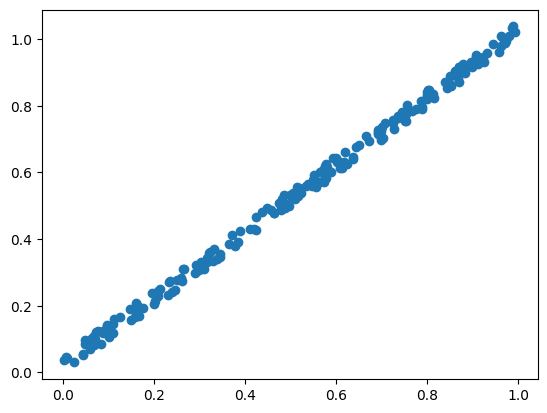

In [38]:
plt.scatter(x, y)
plt.show()

In [39]:
def k_fold_split(x, y, k):
    """
    Perform k-fold dataset split.

    Parameters:
    - x: Input features
    - y: Target values
    - k: Number of folds

    Returns:
    - List of tuples (x_train, y_train, x_valid, y_valid) for each fold
    """
    n_samples = len(x)  # 100 , K = 5
    fold_size = n_samples // k  # 20
    folds = []
    
    indices = np.arange(n_samples)

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i < k - 1 else n_samples

        valid_indices = indices[start:end]
        train_indices = np.concatenate([indices[:start], indices[end:]])

        x_train, y_train = x[train_indices], y[train_indices]
        x_valid, y_valid = x[valid_indices], y[valid_indices]

        x_train = x_train.flatten()
        x_valid = x_valid.flatten()
        y_train = y_train.flatten()
        y_valid = y_valid.flatten()

        folds.append((x_train, y_train, x_valid, y_valid))

    return folds

In [40]:
k = 10
folds = k_fold_split(x, y, k)

Fold 1:
Train set size: 180, Validation set size: 20
(180,) (180,) (20,) (20,)
0.00027054023610210395


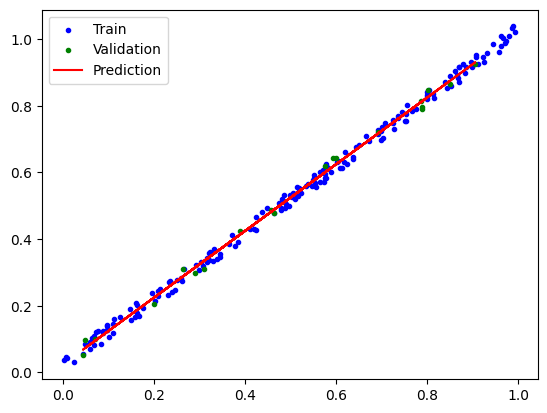

Fold 2:
Train set size: 180, Validation set size: 20
(180,) (180,) (20,) (20,)
0.0002578256074552497


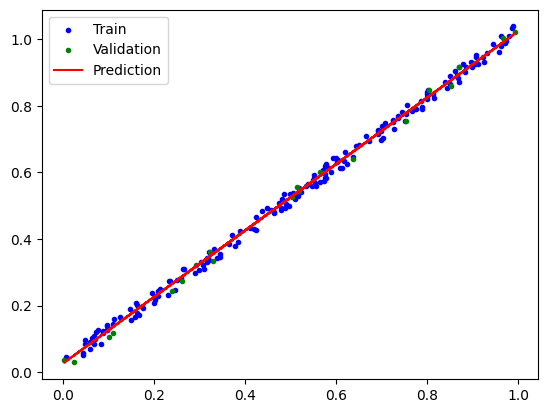

Fold 3:
Train set size: 180, Validation set size: 20
(180,) (180,) (20,) (20,)
0.00018389567166496673


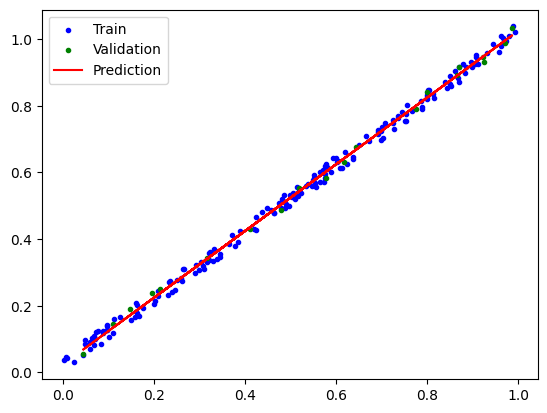

Fold 4:
Train set size: 180, Validation set size: 20
(180,) (180,) (20,) (20,)
0.00018496915549081298


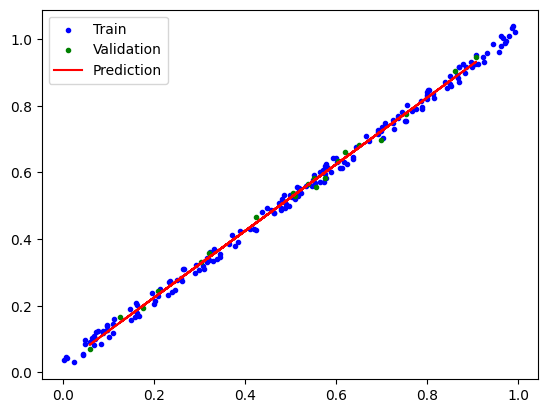

Fold 5:
Train set size: 180, Validation set size: 20
(180,) (180,) (20,) (20,)
0.00024332672480391983


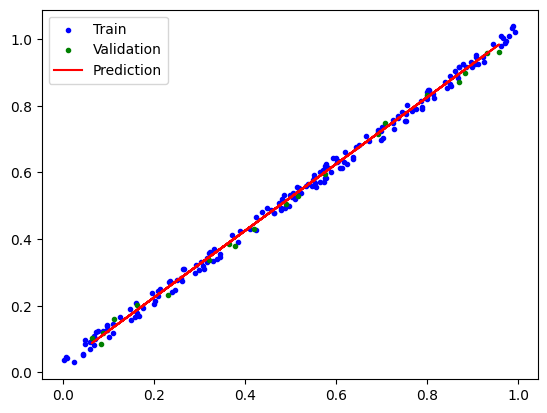

Fold 6:
Train set size: 180, Validation set size: 20
(180,) (180,) (20,) (20,)
0.0002159795897226671


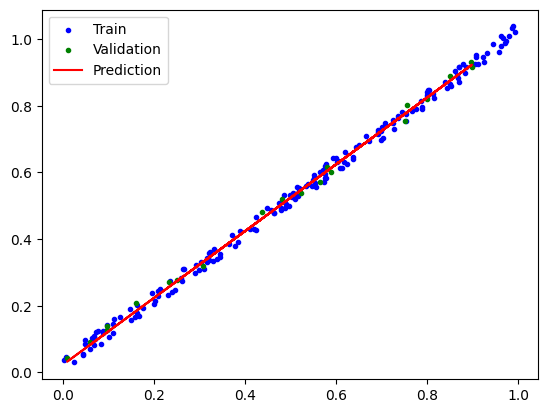

Fold 7:
Train set size: 180, Validation set size: 20
(180,) (180,) (20,) (20,)
0.00018265632619223504


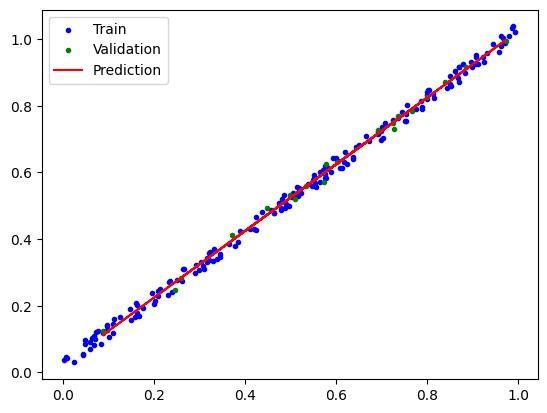

Fold 8:
Train set size: 180, Validation set size: 20
(180,) (180,) (20,) (20,)
0.00021811002099800415


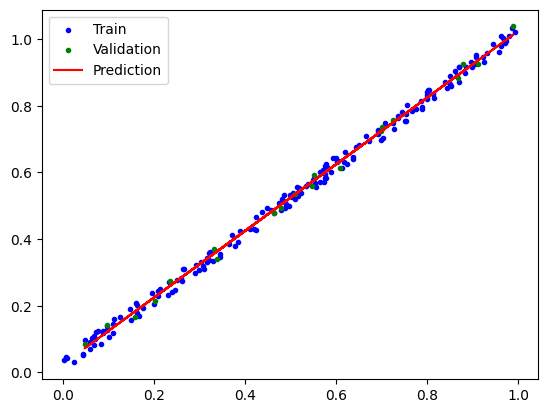

Fold 9:
Train set size: 180, Validation set size: 20
(180,) (180,) (20,) (20,)
0.0002478839606608749


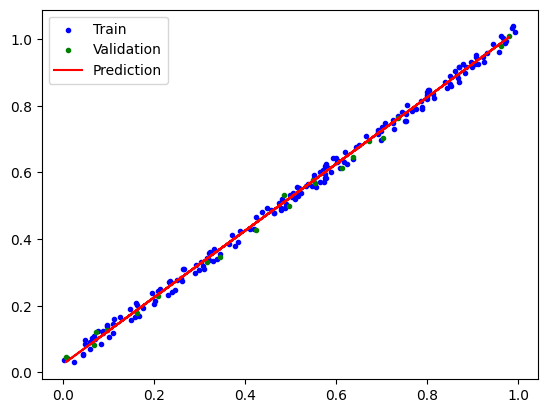

Fold 10:
Train set size: 180, Validation set size: 20
(180,) (180,) (20,) (20,)
0.00031051679618523785


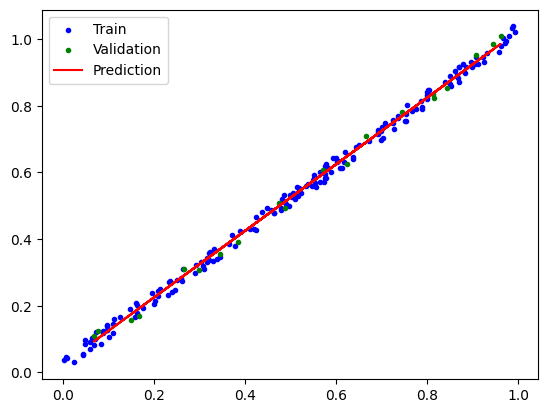

In [43]:
for i, fold in enumerate(folds):
    x_train, y_train, x_valid, y_valid = fold
    print(f"Fold {i + 1}:")
    print(f"Train set size: {len(x_train)}, Validation set size: {len(x_valid)}")
    print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)

    # train
    slope, intercept, r, p, std_err = stats.linregress(x_train, y_train)
    w = slope
    b = intercept

    # validation
    # y = w * x + b
    y_valid_pred = w * x_valid + b
    mse = np.sum((y_valid - y_valid_pred) ** 2) / len(y_valid)
    print(mse)

    plt.scatter(x_train, y_train, c="blue", marker=".")
    plt.scatter(x_valid, y_valid, c="green", marker=".")
    plt.plot(x_valid, y_valid_pred, c="red")
    plt.legend(["Train", "Validation", "Prediction"])
    plt.show()